<a href="https://colab.research.google.com/github/Sanjibjena/Deep-Learning-Term1/blob/main/DEFCON_Level_Prediction_Project_with_DeepL_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="500" height="300" />

# DEFCON Level Prediction Project



## Table of Content


1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Data Preprocessing](#section4)<br>
 - 4.1 [Data Cleaning](#section401)<br>
 - 4.2 [Label encoding](#section402)<br>
 - 4.3 [Preparing X and y using pandas](#section403)<br>
 - 4.4 [Spliting dataset into training set and test set](#section404)<br>  
 - 4.5 [Split Features from Labels](#section405)<br>
 - 4.6 [Normalize the Data](#section406)<br>
5. [Modelling and Prediction](#section5)<br>
    - 5.1 [Build the Model](#section501)<br>
    - 5.2 [Inspect the Model](#section502)<br>
    - 5.3 [Train the Model](#section503)<br>
    - 5.4 [Make Predictions](#section504)<br>
6. [Model Tuning](#section6)<br>
 - 6.1 [Increasing Number of Hidden Layers and Hidden Units](#section601)<br>
 
7. [Conclusion](#section7)<br>
    - 7.1 [Actionable Insights](#section701)

## 1. Problem Statement

   The Military conflict is an intense state of violence. In such situations, it is crucial for a nation to stay alert, cope with it, and mitigate its implications. A country has set up the __DEFCON__ (Defense Readiness Condition) warning system. This alert system is used to gauge the level of alertness of the defense forces. It consists of five levels of readiness for the military forces to be prepared for the consequences of the conflict. The DEFCON system allows the nation’s forces to be a step ahead of its rivals.
Based on dataset to build a model that can accurately predict the DEFCON level raised as a result of the conflict.

<a id=section2></a>
## 2. Data Loading and Description

The DEFCON Level dataset contains the following data.

- Allied_Nations: The number of nations that have joined together as allies.
- Diplomatic_Meetings_Set: The number of meetings with the intent to resolve the conflict that is planned.
- Percent_Of_Forces_Mobilized: Same as the name of the variable.
- Hostile_Nations: The number of enemy nations that have allied together.
- Active_Threats: The number of situations or threats that require immediate attention.
- Inactive_Threats: The number of situations or threats being monitored for activity or escalation.
- Citizen_Fear_Index: The percentage of citizens who fear catastrophic military conflicts.
- Closest_Threat_Distance(km): The closest threat to the border of the country in question.
- Aircraft_Carriers_Responding: The number of aircraft carriers actively traveling towards a threat to neutralize it.
- Troops_Mobilized(thousands): The number of troops that are activated and responding to the threats.
- DEFCON_Level(target variable): A numeric scale of conflict 'seriousness' with 1 being the least serious and 5 being the most.
- ID: An ID to aid a checker script.


__Importing Packages__

In [14]:
import numpy as np                     
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## import pandas_profiling

from sklearn import metrics
import numpy as np
                                                                    # Allow plots to appear directly in the notebook
%matplotlib inline                                       
  
# importing alll the necessary packages to use the various classification algorithms

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing
from sklearn import metrics # for checking the model accuracy
import tensorflow as tf
import kerastuner as kt
from tensorflow import keras
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models, layers
from kerastuner import HyperModel, RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from keras.callbacks import EarlyStopping



import warnings
warnings.filterwarnings("ignore")                   # To suppress all the warnings in the notebook.


In [19]:
# Importing the DEFCON dataset using Pandas Dataframe.

Project= pd.read_csv('https://raw.githubusercontent.com/Sanjibjena/Deep-Learning-Term1/main/defcon_level.csv')
Project.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,3,7570
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,4,12128
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,3,2181
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0,3,5946
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0,2,9054


In [4]:
Project.shape

(10000, 12)

What are the **features**?

- Allied_Nations: The number of nations that have joined together as allies.
- Diplomatic_Meetings_Set: The number of meetings with the intent to resolve the conflict that is planned.
- Percent_Of_Forces_Mobilized: Same as the name of the variable.
- Hostile_Nations: The number of enemy nations that have allied together.
- Active_Threats: The number of situations or threats that require immediate attention.
- Inactive_Threats: The number of situations or threats being monitored for activity or escalation.
- Citizen_Fear_Index: The percentage of citizens who fear catastrophic military conflicts.
- Closest_Threat_Distance(km): The closest threat to the border of the country in question.
- Aircraft_Carriers_Responding: The number of aircraft carriers actively traveling towards a threat to neutralize it.
- Troops_Mobilized(thousands): The number of troops that are activated and responding to the threats.
- DEFCON_Level(target variable): A numeric scale of conflict 'seriousness' with 1 being the least serious and 5 being the most.
- ID: An ID to aid a checker script.


<a id=section3></a>
## 3. Exploratory Data Analysis

In [20]:
# Print all cell's output and not just the last one

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [21]:
Project.shape

(10000, 12)

In [6]:
Project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Allied_Nations                10000 non-null  int64  
 1   Diplomatic_Meetings_Set       10000 non-null  int64  
 2   Percent_Of_Forces_Mobilized   10000 non-null  float64
 3   Hostile_Nations               10000 non-null  int64  
 4   Active_Threats                10000 non-null  float64
 5   Inactive_Threats              10000 non-null  float64
 6   Citizen_Fear_Index            10000 non-null  float64
 7   Closest_Threat_Distance(km)   10000 non-null  float64
 8   Aircraft_Carriers_Responding  10000 non-null  int64  
 9   Troops_Mobilized(thousands)   10000 non-null  float64
 10  DEFCON_Level                  10000 non-null  int64  
 11  ID                            10000 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 937.6 KB


- ```info``` function gives us the following insights into the dataframe:

  - There are a total of **10000 samples (rows)** and **12 columns** in the dataframe.
  
  - There are **6 columns** with **Int** datatype.
  - There are **6 columns** with **Float** datatype.
  

In [7]:
# The dataset contains no unknown values.

Project.isna().sum()

Allied_Nations                  0
Diplomatic_Meetings_Set         0
Percent_Of_Forces_Mobilized     0
Hostile_Nations                 0
Active_Threats                  0
Inactive_Threats                0
Citizen_Fear_Index              0
Closest_Threat_Distance(km)     0
Aircraft_Carriers_Responding    0
Troops_Mobilized(thousands)     0
DEFCON_Level                    0
ID                              0
dtype: int64

In [8]:
# Statistics values


Project.describe(include ='all')

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,8.317800,0.524100,0.270548,2.50230,15.754300,46.534600,0.486639,350.885758,0.891300,9.174874e+05,2.616600,6266.554200
std,1.748802,0.500244,0.196434,1.31178,10.388906,34.012649,0.134552,16.285744,0.329082,9.271764e+04,0.802788,3610.170288
min,5.000000,0.000000,0.000000,1.00000,1.000000,6.000000,0.000000,290.440000,0.000000,7.392000e+05,1.000000,2.000000
25%,7.000000,0.000000,0.090000,2.00000,7.000000,21.000000,0.406021,340.260000,1.000000,8.360000e+05,2.000000,3139.750000
50%,8.000000,1.000000,0.260000,2.00000,13.000000,37.000000,0.486784,350.860000,1.000000,8.976000e+05,3.000000,6280.500000
75%,9.000000,1.000000,0.430000,3.00000,21.000000,62.000000,0.567548,360.400000,1.000000,9.768000e+05,3.000000,9391.500000
max,16.000000,2.000000,1.000000,16.00000,72.000000,289.000000,1.000000,425.060000,2.000000,1.311200e+06,5.000000,12500.000000



- ```Describe``` function gives us the following insights into the data:
   - There are 10000 **observations** in the dataset.
  
   - As we can see here, mean value is leaser than the median value of each column.
  
  - Similarly comparing the **75%** and **max** values of the other columns we can see that there are ** outliers** present in  columns.
  
   

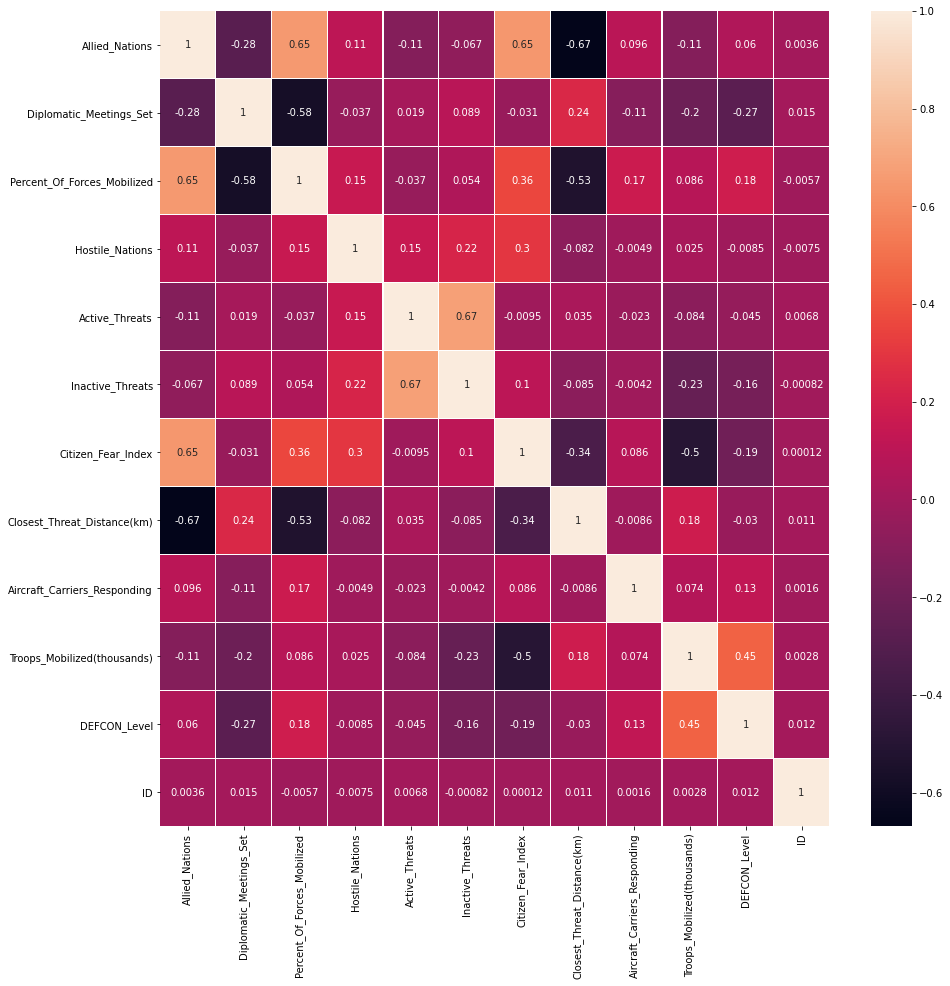

In [9]:
# Correlation heatmap for dataset

sns.heatmap(Project.corr(), annot=True, linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

In [11]:
Project.corr()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
Allied_Nations,1.000000,-0.278779,0.650308,0.111896,-0.113609,-0.067496,0.647604,-0.668521,0.096352,-0.110071,0.060440,0.003590
Diplomatic_Meetings_Set,-0.278779,1.000000,-0.576116,-0.036662,0.019046,0.089007,-0.030756,0.241155,-0.106499,-0.201561,-0.274835,0.014537
Percent_Of_Forces_Mobilized,0.650308,-0.576116,1.000000,0.149317,-0.036675,0.054474,0.357324,-0.529314,0.166989,0.085870,0.184876,-0.005668
Hostile_Nations,0.111896,-0.036662,0.149317,1.000000,0.146773,0.220252,0.299244,-0.081724,-0.004865,0.025103,-0.008469,-0.007541
Active_Threats,-0.113609,0.019046,-0.036675,0.146773,1.000000,0.674970,-0.009510,0.034700,-0.023317,-0.084188,-0.044782,0.006807
Inactive_Threats,-0.067496,0.089007,0.054474,0.220252,0.674970,1.000000,0.103296,-0.084670,-0.004199,-0.227941,-0.161675,-0.000820
Citizen_Fear_Index,0.647604,-0.030756,0.357324,0.299244,-0.009510,0.103296,1.000000,-0.336929,0.085540,-0.495305,-0.190940,0.000119
Closest_Threat_Distance(km),-0.668521,0.241155,-0.529314,-0.081724,0.034700,-0.084670,-0.336929,1.000000,-0.008636,0.177008,-0.030033,0.010935
Aircraft_Carriers_Responding,0.096352,-0.106499,0.166989,-0.004865,-0.023317,-0.004199,0.085540,-0.008636,1.000000,0.073819,0.125775,0.001647
Troops_Mobilized(thousands),-0.110071,-0.201561,0.085870,0.025103,-0.084188,-0.227941,-0.495305,0.177008,0.073819,1.000000,0.450504,0.002800


In [12]:
# Text represent of correlation.

corr = Project.corr()
corr.style.background_gradient(cmap='coolwarm')

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
Allied_Nations,1.000000,-0.278779,0.650308,0.111896,-0.113609,-0.067496,0.647604,-0.668521,0.096352,-0.110071,0.060440,0.003590
Diplomatic_Meetings_Set,-0.278779,1.000000,-0.576116,-0.036662,0.019046,0.089007,-0.030756,0.241155,-0.106499,-0.201561,-0.274835,0.014537
Percent_Of_Forces_Mobilized,0.650308,-0.576116,1.000000,0.149317,-0.036675,0.054474,0.357324,-0.529314,0.166989,0.085870,0.184876,-0.005668
Hostile_Nations,0.111896,-0.036662,0.149317,1.000000,0.146773,0.220252,0.299244,-0.081724,-0.004865,0.025103,-0.008469,-0.007541
Active_Threats,-0.113609,0.019046,-0.036675,0.146773,1.000000,0.674970,-0.009510,0.034700,-0.023317,-0.084188,-0.044782,0.006807
Inactive_Threats,-0.067496,0.089007,0.054474,0.220252,0.674970,1.000000,0.103296,-0.084670,-0.004199,-0.227941,-0.161675,-0.000820
Citizen_Fear_Index,0.647604,-0.030756,0.357324,0.299244,-0.009510,0.103296,1.000000,-0.336929,0.085540,-0.495305,-0.190940,0.000119
Closest_Threat_Distance(km),-0.668521,0.241155,-0.529314,-0.081724,0.034700,-0.084670,-0.336929,1.000000,-0.008636,0.177008,-0.030033,0.010935
Aircraft_Carriers_Responding,0.096352,-0.106499,0.166989,-0.004865,-0.023317,-0.004199,0.085540,-0.008636,1.000000,0.073819,0.125775,0.001647
Troops_Mobilized(thousands),-0.110071,-0.201561,0.085870,0.025103,-0.084188,-0.227941,-0.495305,0.177008,0.073819,1.000000,0.450504,0.002800


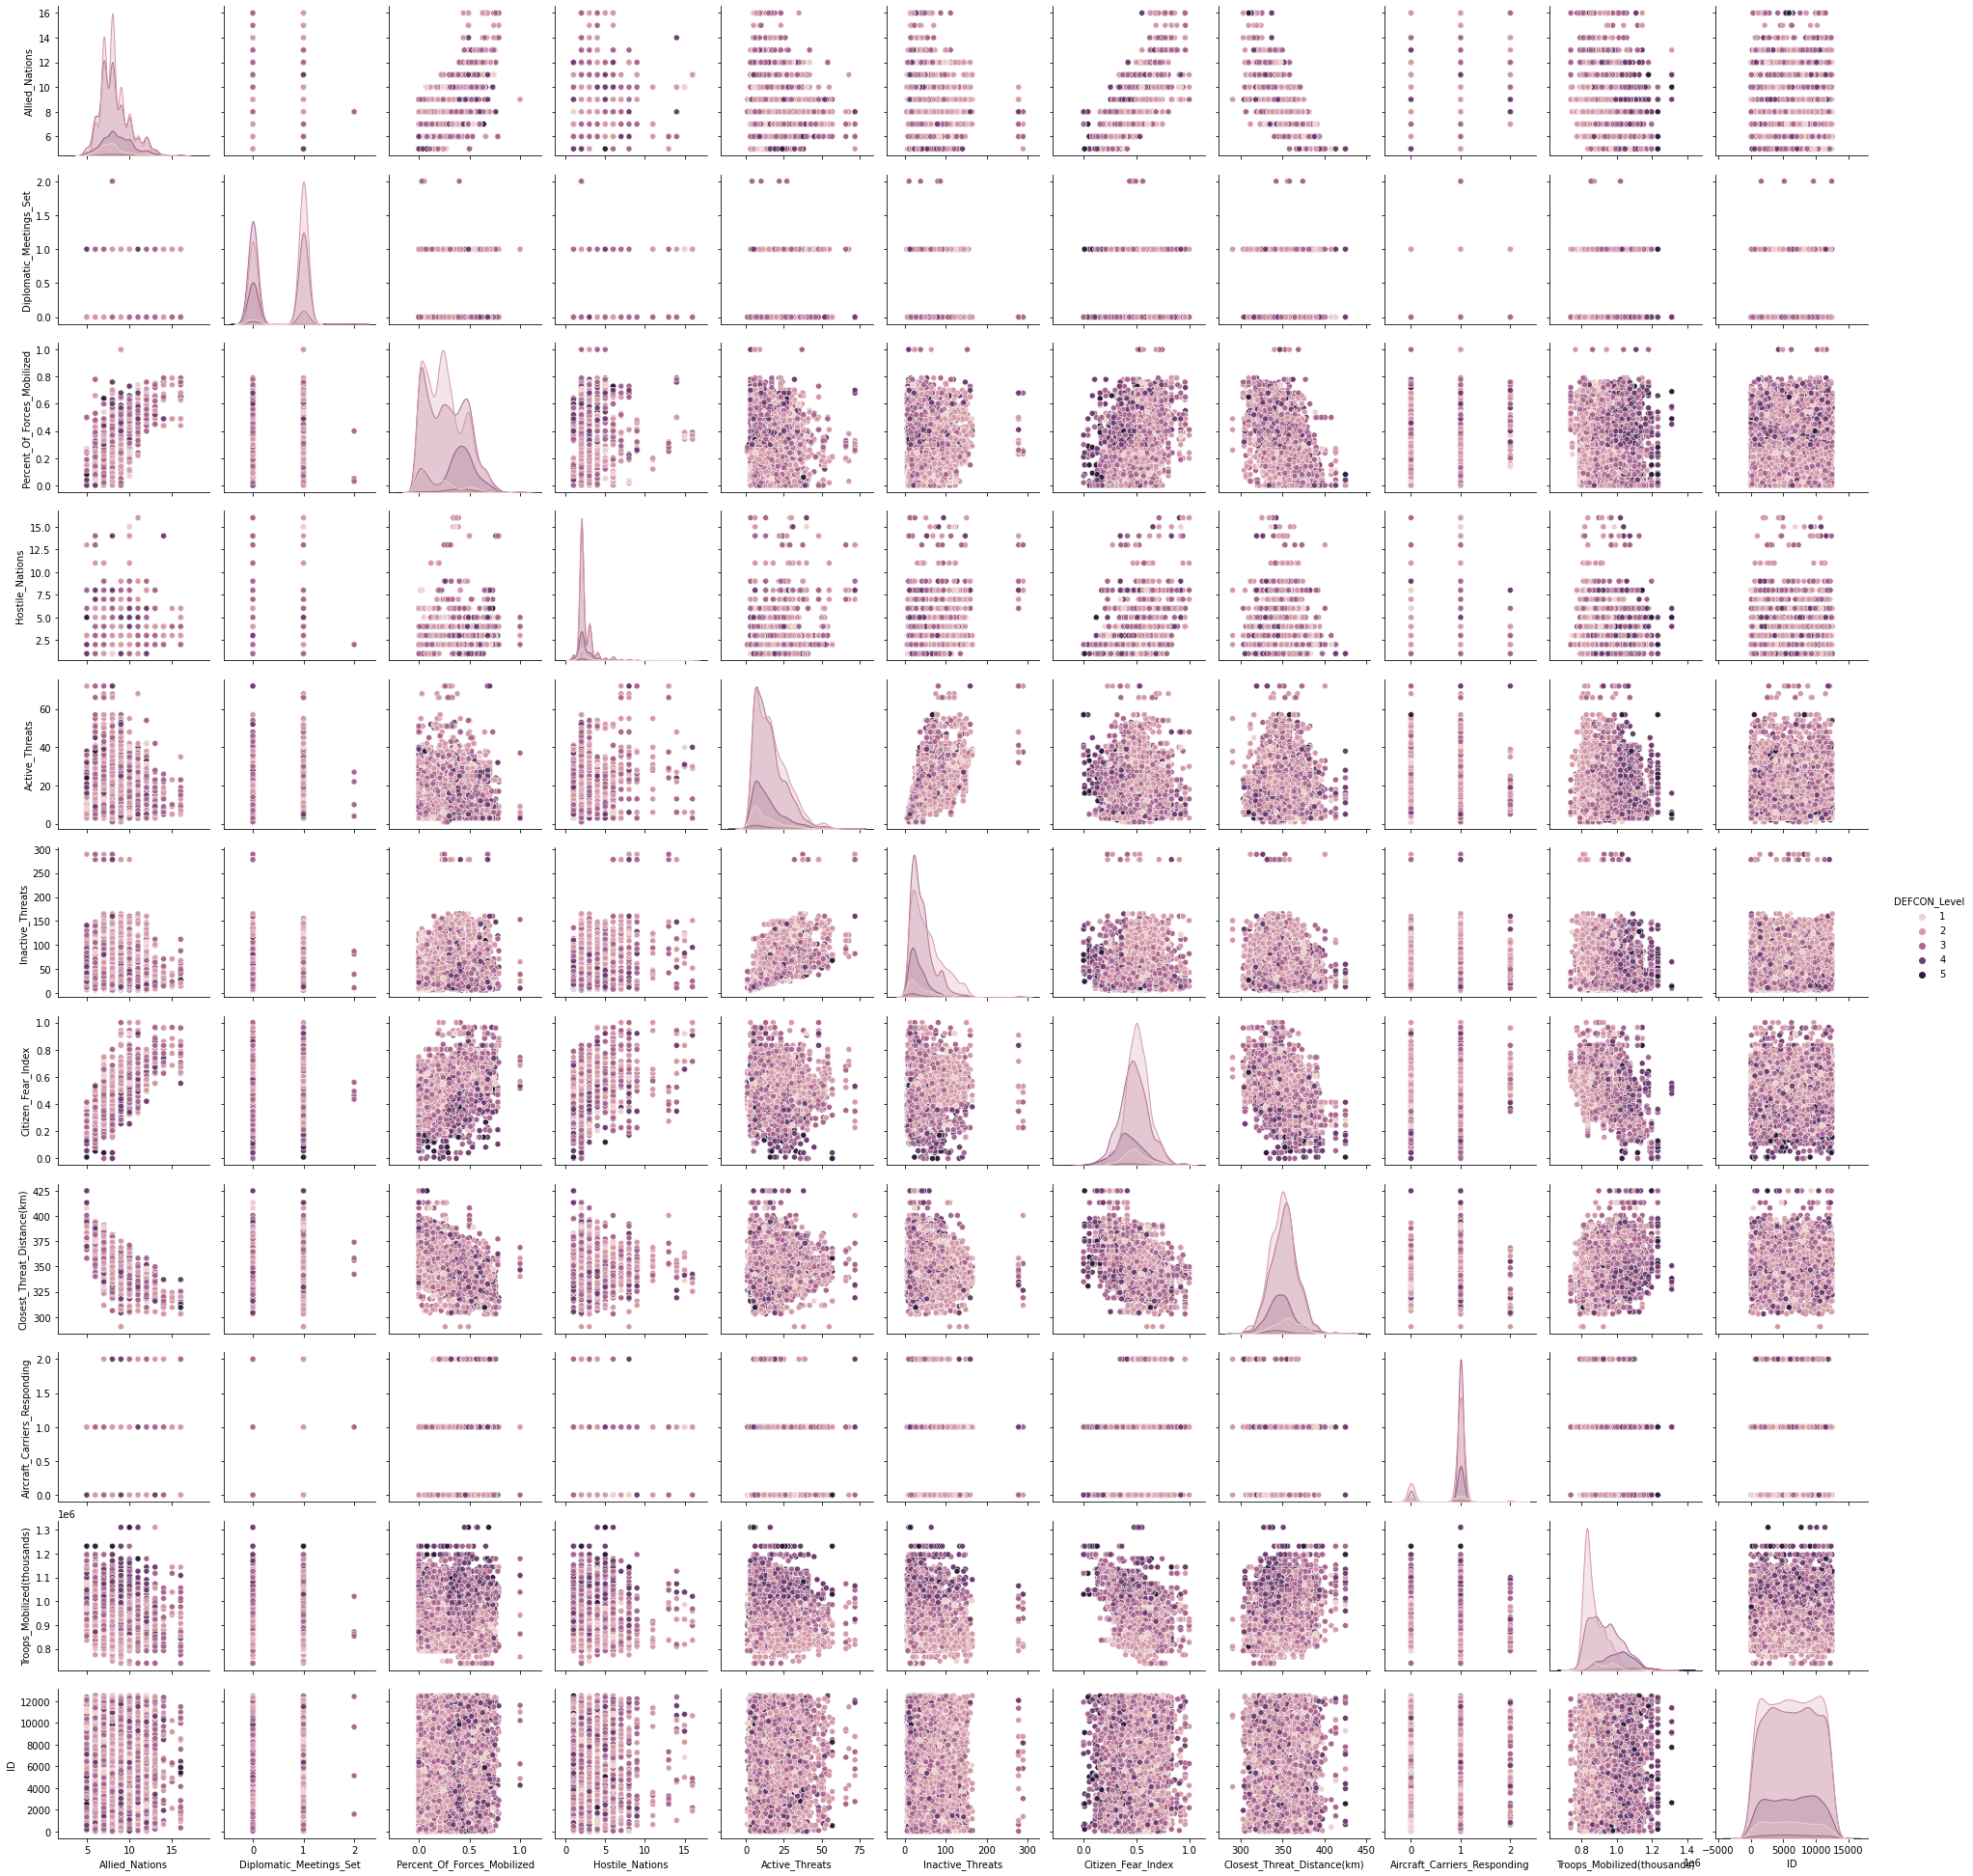

In [13]:
sns.pairplot(Project,hue='DEFCON_Level')

- The overall statistics.

As our target column is '__DEFCON__' and see the overall data distribution.

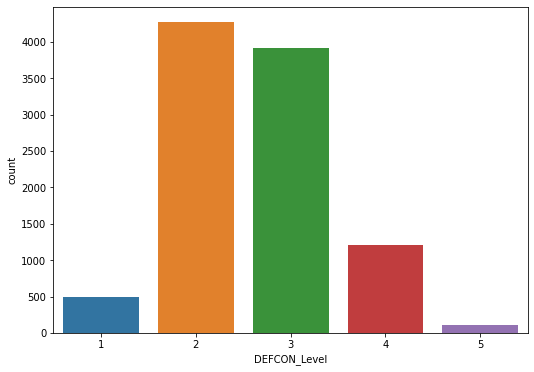

In [22]:
# Bar chart of target column.


a4_dims = (8.5, 6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(Project.DEFCON_Level,label='DEFCON_Level')

- The less data for DEFCON level 1 and 5. Models learn less for these levels
- The above graph shows highly biased data.

[4270, 3910, 1212, 498, 110]

Text(0.5, 1.0, 'DEFCON_Level')

(-1.1208830215880936,
 1.100994429599433,
 -1.1232247740425976,
 1.1274167464426743)

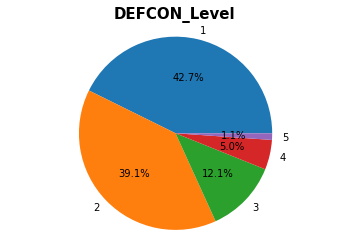

In [15]:
# Data distribution of target value using Pie chart.

x = Project['DEFCON_Level'].value_counts()
x.tolist()
DefconLevel = ['1', '2', '3' , '4' , '5']
piechart = plt.pie(x,  labels = DefconLevel, autopct = '%1.1f%%')
plt.title('DEFCON_Level', fontsize = 15, fontweight = 'bold')
plt.axis('equal')
plt.show()

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

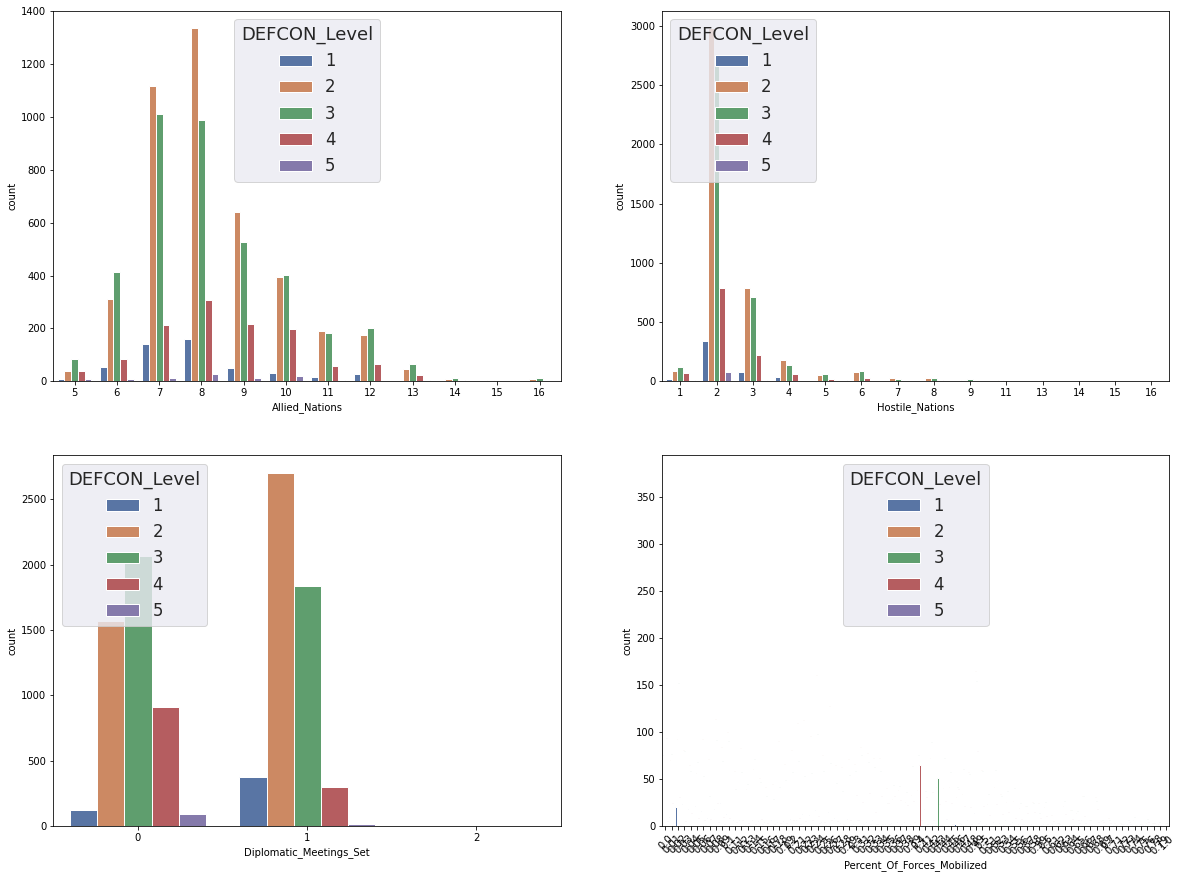

In [22]:
#fig, ((a,b),(c,d),(e,f)) = plt.subplots(2,2,figsize=(25,30))
fig, ((a,b),(c,d)) = plt.subplots(2,2,figsize=(20,15))
plt.xticks(rotation=45)
#plt.set_xticklabels(labels, rotation='vertical')
sns.set(font_scale=1.5)
#sns.countplot(df['id'],hue=df['DEFCON_Level'],ax=a)
sns.countplot(Project['Allied_Nations'],hue=Project['DEFCON_Level'],ax=a)
sns.countplot(Project['Diplomatic_Meetings_Set'],hue=Project['DEFCON_Level'],ax=c)
sns.countplot(Project['Percent_Of_Forces_Mobilized'],hue=Project['DEFCON_Level'],ax=d)
sns.countplot(Project['Hostile_Nations'],hue=Project['DEFCON_Level'],ax=b)
#sns.countplot(df['citizen_fear_index'],hue=df['defcon_level'],ax=e)

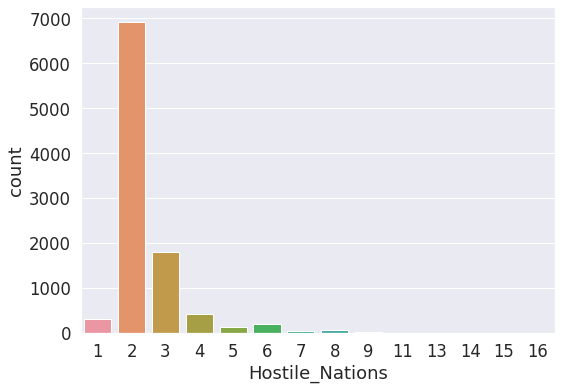

In [23]:
a4_dims = (8.5, 6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(Project.Hostile_Nations,label="Hostile_Nations")

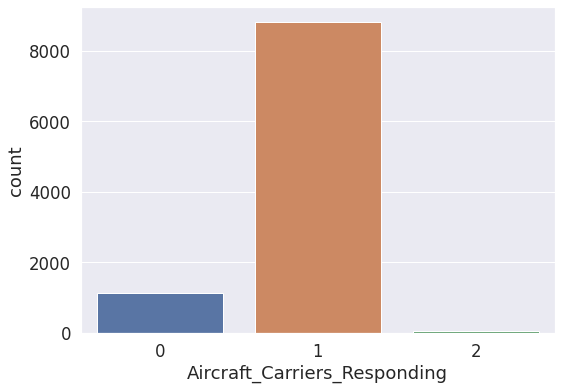

In [24]:
a4_dims = (8.5, 6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(Project.Aircraft_Carriers_Responding,label="Aircraft_Carriers_Responding")

# Data Visualization

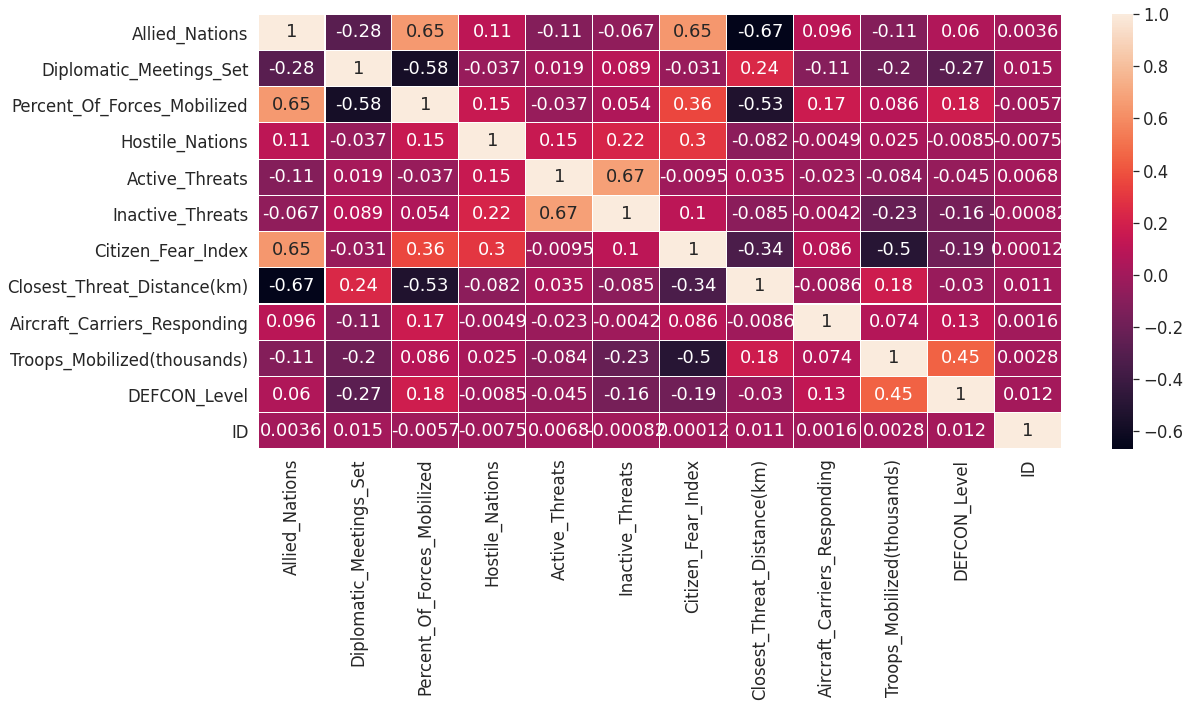

In [25]:
# Correlation heatmap for dataset

sns.heatmap(Project.corr(), annot=True, linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.show()

<a id=section4></a>
## 4. Data Preprocessing

<a id=section4.1></a>
## 4.1 Data Cleaning

In [28]:
# Dropping the 'ID' column,

Project.drop(['ID'], axis=1, inplace=True)

In [29]:
Project.shape

(10000, 11)

<a id=section401></a>

# 4.2 Label encoding

Creating Dummy Variables

In [33]:

df_Train_new = pd.get_dummies(Project, columns=['Allied_Nations', 'Hostile_Nations', 'Diplomatic_Meetings_Set', 'Aircraft_Carriers_Responding'])

In [34]:
X_Train = df_Train_new.drop(columns=['DEFCON_Level'], axis=1)
y_Train = df_Train_new['DEFCON_Level']

In [35]:
X_Train.shape

(10000, 38)

In [36]:
X_Train.head()

,Percent_Of_Forces_Mobilized,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Troops_Mobilized(thousands),Allied_Nations_5,Allied_Nations_6,Allied_Nations_7,Allied_Nations_8,Allied_Nations_9,Allied_Nations_10,Allied_Nations_11,Allied_Nations_12,Allied_Nations_13,Allied_Nations_14,Allied_Nations_15,Allied_Nations_16,Hostile_Nations_1,Hostile_Nations_2,Hostile_Nations_3,Hostile_Nations_4,Hostile_Nations_5,Hostile_Nations_6,Hostile_Nations_7,Hostile_Nations_8,Hostile_Nations_9,Hostile_Nations_11,Hostile_Nations_13,Hostile_Nations_14,Hostile_Nations_15,Hostile_Nations_16,Diplomatic_Meetings_Set_0,Diplomatic_Meetings_Set_1,Diplomatic_Meetings_Set_2,Aircraft_Carriers_Responding_0,Aircraft_Carriers_Responding_1,Aircraft_Carriers_Responding_2
0,0.67,6.0,25.0,0.787812,324.36,862400.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.11,38.0,48.0,0.419236,359.34,959200.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0.49,32.0,69.0,0.582232,332.84,836000.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,0.30,31.0,52.0,0.589574,358.28,924000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.12,13.0,42.0,0.552863,364.64,968000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [43]:
y_Train.value_counts()

2    4270
3    3910
4    1212
1     498
5     110
Name: DEFCON_Level, dtype: int64

# 4.6 Normalize the Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mmScalerX = MinMaxScaler()

X_Train_s = mmScalerX.fit_transform(X_Train)

In [ ]:
from imblearn.over_sampling import SMOTE

X_Train_resampled, y_Train_resampled = SMOTE(random_state=25).fit_resample(X_Train_s, y_Train)

In [ ]:
X_Train_resampled.shape

## 4.3 Preparing X and y using pandas

- __Standardization__. <br/>
Standardize features by removing the _mean_ and scaling to _unit standard deviation_.

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Project_final_sc = sc.fit_transform(Project)

In [26]:
Y = Project['DEFCON_Level']

In [27]:
print(type(Y))
print(Y.shape)

<class 'pandas.core.series.Series'>
(10000,)


In [29]:
X = Project

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Allied_Nations                10000 non-null  int64  
 1   Diplomatic_Meetings_Set       10000 non-null  int64  
 2   Percent_Of_Forces_Mobilized   10000 non-null  float64
 3   Hostile_Nations               10000 non-null  int64  
 4   Active_Threats                10000 non-null  float64
 5   Inactive_Threats              10000 non-null  float64
 6   Citizen_Fear_Index            10000 non-null  float64
 7   Closest_Threat_Distance(km)   10000 non-null  float64
 8   Aircraft_Carriers_Responding  10000 non-null  int64  
 9   Troops_Mobilized(thousands)   10000 non-null  float64
 10  DEFCON_Level                  10000 non-null  int64  
 11  ID                            10000 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 937.6 KB


<a id=section404></a>

# 4.4 Spliting dataset into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=5)

In [ ]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

In [ ]:
X_train.head()

In [ ]:
X_train.info()

<a id=section405></a>

# 4.7 Data Visualization

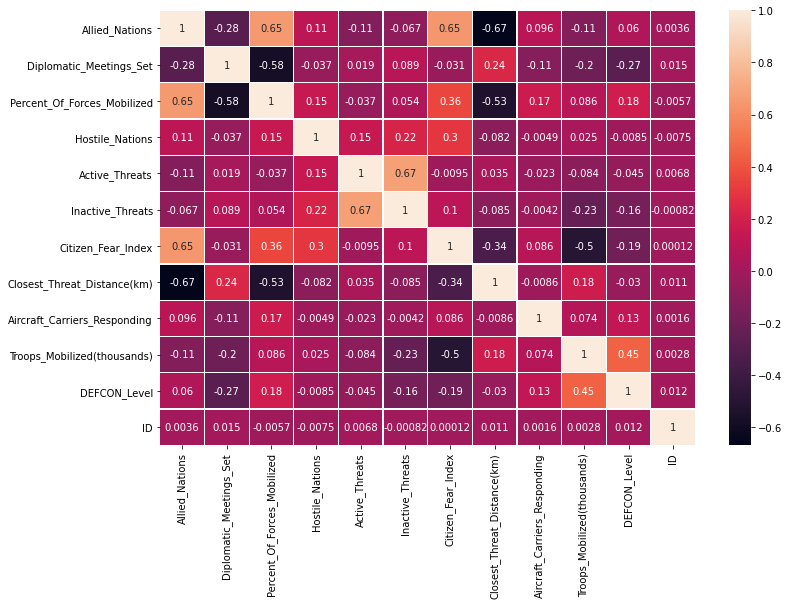

In [31]:
# Correlation heatmap for Train dataset

sns.heatmap(Project.corr(), annot=True, linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

<a id=section5></a>

# 5 Modelling and Prediction

<a id=section501></a>

# 5.1 Build the Model

In [48]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

print(tf.__version__)

2.4.1


In [49]:
import matplotlib.pyplot as plt

In [50]:
#!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-n5b76ahw
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-n5b76ahw
     |████████████████████████████████| 1.0MB 5.1MB/s 
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.02af7ad07ad4d26f3bae069e055bb02187204576f_-cp37-none-any.whl size=151174 sha256=a774473e2853a5e026c4bb1cc0c162c8f4956d7270e0aa7efe6a93d040ae0b2a
  Stored in directory: /tmp/pip-ephem-wheel-cache-gmtxhazj/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4


In [51]:


import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling



In [52]:
def build_model():
  model = keras.Sequential([layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=[X_Train_resampled.shape[1]]),
                            layers.Dropout(0.2),
                            layers.Dense(384, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
                            layers.Dropout(0.2),
                            layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
                            layers.Dropout(0.2),
                            layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
                            layers.Dropout(0.2),
                            layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
                            layers.Dropout(0.2),
                            layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
                            layers.Dropout(0.2),
                            layers.Dense(6, activation='softmax')
                            ])

  # Defining the optimizer with a specific learning rate of 0.001
  optimizer = tf.keras.optimizers.Adam(0.001, amsgrad=True)

  # Compiling the model
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [53]:
model = None
del model
model = build_model()

In [54]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)

In [62]:
EPOCHS=100
BATCHES=15

In [63]:
history = model.fit(X_Train_resampled, y_Train_resampled, epochs=EPOCHS, batch_size=BATCHES, validation_split=0.2,
                    verbose=2, callbacks=[early_stop, tfdocs.modeling.EpochDots()])

Epoch 1/100
1139/1139 - 7s - loss: 0.9769 - accuracy: 0.6073 - val_loss: 4.0445 - val_accuracy: 0.0237

Epoch: 0, accuracy:0.6073,  loss:0.9769,  val_accuracy:0.0237,  val_loss:4.0445,  
.Epoch 2/100
1139/1139 - 6s - loss: 0.9709 - accuracy: 0.6149 - val_loss: 4.3029 - val_accuracy: 0.0220
.Epoch 3/100
1139/1139 - 6s - loss: 0.9696 - accuracy: 0.6177 - val_loss: 3.8593 - val_accuracy: 0.0239
.Epoch 4/100
1139/1139 - 6s - loss: 0.9614 - accuracy: 0.6195 - val_loss: 4.0893 - val_accuracy: 0.0206
.Epoch 5/100
1139/1139 - 6s - loss: 0.9592 - accuracy: 0.6238 - val_loss: 4.1847 - val_accuracy: 0.0215
.Epoch 6/100
1139/1139 - 6s - loss: 0.9621 - accuracy: 0.6187 - val_loss: 4.1698 - val_accuracy: 0.0227
.Epoch 7/100
1139/1139 - 6s - loss: 0.9563 - accuracy: 0.6241 - val_loss: 4.2065 - val_accuracy: 0.0227
.Epoch 8/100
1139/1139 - 6s - loss: 0.9645 - accuracy: 0.6190 - val_loss: 4.2717 - val_accuracy: 0.0222
.Epoch 9/100
1139/1139 - 6s - loss: 0.9523 - accuracy: 0.6289 - val_loss: 4.5238 - va

In [64]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
49,0.892969,0.664930,4.083440,0.024356,49
50,0.900193,0.667330,3.915659,0.023185,50
51,0.892447,0.665574,4.009541,0.022717,51
52,0.889745,0.664403,4.344988,0.022951,52
53,0.883486,0.669379,3.974897,0.023888,53


In [65]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

(0.0, 2.0)

Text(0, 0.5, 'Loss')

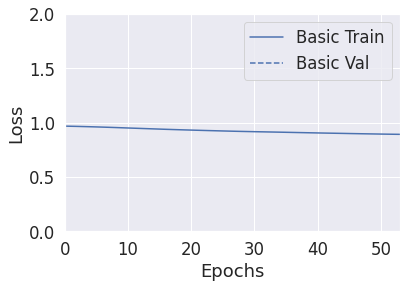

In [66]:
plotter.plot({'Basic': history}, metric="loss")
plt.ylim([0, 2])
plt.ylabel('Loss')

(0.0, 2.0)

Text(0, 0.5, 'Accuracy')

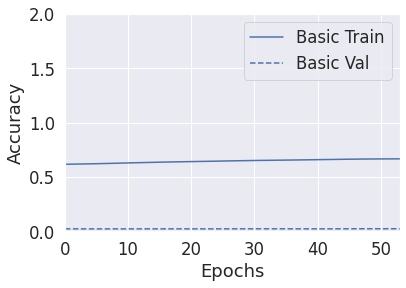

In [67]:
plotter.plot({'Basic': history}, metric="accuracy")
plt.ylim([0, 2])
plt.ylabel('Accuracy')

In [68]:
model.evaluate(X_Train_resampled, y_Train_resampled, verbose=2, batch_size=BATCHES)

1424/1424 - 2s - loss: 1.4441 - accuracy: 0.5688


[1.4441206455230713, 0.5687587857246399]

## 7. Conclusion

- It observed that some of features are overfitting.
- To improve the performance, tuning the model.
- Early stopping is a useful technique to prevent overfitting.


<a id=section701></a>
### 7.1 Actionable Insights

- The prediction will give number to Military, what action should be taken based on DEFCON number.
  
  - DEFCON 1 Maximum force readiness.
  - DEFCON 2 Further Increase in force readiness, but less than maximum readiness
  - DEFCON 3 Increase in force readiness above normal readiness
  - DEFCON 4 Normal, increased intelligence and - strengthened security measures
  - DEFCON 5 Normal peacetime readiness